In [52]:
# Importing Packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [38]:
# Importing Dataset and setting the na_values parameter to '?' as mentioned by the providers
# of the dataset all missing values are labelled with a '?' Symbol

prognosis_dataset = pd.read_csv('Dataset/wpbc.data', header=None, na_values=['?']) 

# Setting names to each Column of the Dataset (As the Columns in the Dataset are not with Column Names) 

prognosis_dataset.columns = ["id", "outcome", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", 
                 "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean",
                 "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
                 "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se",
                 "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst",
                 "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst",
                 "fractal_dimension_worst", "time", "tumor_size", "positive_axillary_lymph_node"]

# Deleting the First Column 'id' because it is just used to Uniquely Identify each row

del prognosis_dataset["id"]

prognosis_dataset.T

,0,1,2,3,4,5,6,7,8,9,...,188,189,190,191,192,193,194,195,196,197
outcome,N,N,N,N,R,R,N,R,N,N,...,N,N,N,N,N,N,N,N,R,N
radius_mean,31,61,116,123,27,77,60,77,119,76,...,15,6,8,3,3,10,8,12,3,6
texture_mean,18.02,17.99,21.37,11.42,20.29,12.75,18.98,13.71,13.0,12.46,...,12.53,19.8,19.96,19.22,14.72,22.52,15.44,17.17,21.42,16.7
perimeter_mean,27.6,10.38,17.44,20.38,14.34,15.29,19.61,20.83,21.82,24.04,...,30.98,20.46,27.41,27.18,25.26,21.92,31.18,29.19,22.84,28.13
area_mean,117.5,122.8,137.5,77.58,135.1,84.6,124.4,90.2,87.5,83.97,...,80.41,130.2,130.8,128.8,99.28,146.9,101.0,110.0,145.0,110.3
smoothness_mean,1013.0,1001.0,1373.0,386.1,1297.0,502.7,1112.0,577.9,519.8,475.9,...,490.9,1235.0,1238.0,1134.0,657.5,1597.0,740.4,915.3,1440.0,885.4
compactness_mean,0.09489,0.1184,0.08836,0.1425,0.1003,0.1189,0.09087,0.1189,0.1273,0.1186,...,0.09252,0.09652,0.09075,0.109,0.1174,0.07592,0.09399,0.08952,0.107,0.08896
concavity_mean,0.1036,0.2776,0.1189,0.2839,0.1328,0.1569,0.1237,0.1645,0.1932,0.2396,...,0.06271,0.1077,0.1167,0.1777,0.2112,0.09162,0.1062,0.06655,0.1939,0.1131
concave points_mean,0.1086,0.3001,0.1255,0.2414,0.198,0.1664,0.1213,0.09366,0.1859,0.2273,...,0.06151,0.1599,0.1355,0.2138,0.1729,0.06862,0.1375,0.06583,0.238,0.1012
symmetry_mean,0.07055,0.1471,0.0818,0.1052,0.1043,0.07666,0.0891,0.05985,0.09353,0.08543,...,0.03938,0.08705,0.08397,0.1116,0.09465,0.06367,0.065,0.05068,0.1318,0.04989


In [39]:
# Getting the total number of null values in each column

prognosis_dataset.isnull().sum()

outcome                         0
radius_mean                     0
texture_mean                    0
perimeter_mean                  0
area_mean                       0
smoothness_mean                 0
compactness_mean                0
concavity_mean                  0
concave points_mean             0
symmetry_mean                   0
fractal_dimension_mean          0
radius_se                       0
texture_se                      0
perimeter_se                    0
area_se                         0
smoothness_se                   0
compactness_se                  0
concavity_se                    0
concave points_se               0
symmetry_se                     0
fractal_dimension_se            0
radius_worst                    0
texture_worst                   0
perimeter_worst                 0
area_worst                      0
smoothness_worst                0
compactness_worst               0
concavity_worst                 0
concave points_worst            0
symmetry_worst

In [40]:
# Data Cleaning (Not Required as after cleaning data rows have not reduced)

# The only conflict in terms of Cleaning the Dataset that is unknown is to remove duplicate rows, by using the 
# drop_duplicates method we can get rid of any duplicated rows

prognosis_dataset.drop_duplicates()
print(len(prognosis_dataset.index))

198


In [41]:
# Imputing Missing Data (This is because there are many correlated features and there is data missing for only
# one attribute in each row that is 'positive_axillary_lymph_node')


# Getting Mean of only 'positive_axillary_lymph_node' as it is the only missing attribute and filling in columns
# with na_values usign the fillna() method with the mean as a parameter used to fill all NaN values ('?')

mean_positive_axillary_lymph_node = round(prognosis_dataset['positive_axillary_lymph_node'].mean())
imputed_attribute = prognosis_dataset['positive_axillary_lymph_node'].fillna(mean_positive_axillary_lymph_node)

# Setting the 'positive_axillary_lymph_node' Column of prognosis_dataset to imputed_attribute which is the now
# imputed column

prognosis_dataset.positive_axillary_lymph_node = imputed_attribute

# Getting the total number of null values in each column after Imputing Missing Data

prognosis_dataset.isnull().sum()

outcome                         0
radius_mean                     0
texture_mean                    0
perimeter_mean                  0
area_mean                       0
smoothness_mean                 0
compactness_mean                0
concavity_mean                  0
concave points_mean             0
symmetry_mean                   0
fractal_dimension_mean          0
radius_se                       0
texture_se                      0
perimeter_se                    0
area_se                         0
smoothness_se                   0
compactness_se                  0
concavity_se                    0
concave points_se               0
symmetry_se                     0
fractal_dimension_se            0
radius_worst                    0
texture_worst                   0
perimeter_worst                 0
area_worst                      0
smoothness_worst                0
compactness_worst               0
concavity_worst                 0
concave points_worst            0
symmetry_worst

/home/luqmanr/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


N    151
R     47
Name: outcome, dtype: int64

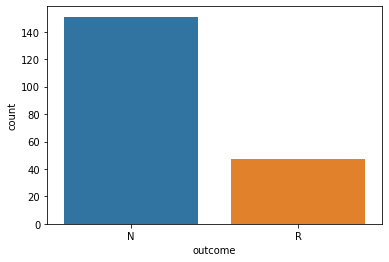

In [42]:
# Finding out the number of Outcomes for Non-Recur and Recur - N = 151, R = 47

ax = sns.countplot(prognosis_dataset.outcome,label="Count")       
prognosis_dataset.outcome.value_counts()

In [43]:

# Saving feature names for later use
feature_list = list(prognosis_dataset.columns)

# Splitting Data into Train and test

train_features, test_features, train_labels, test_labels=train_test_split(
    prognosis_dataset.drop(['outcome'], axis=1),
    prognosis_dataset[['outcome']],
    test_size=0.2,
    random_state=0)

prognosis_dataset

,outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,time,tumor_size,positive_axillary_lymph_node
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5.0
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2.0
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0.0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0.0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2.0
194,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0.0
195,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0.0
196,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,3.0


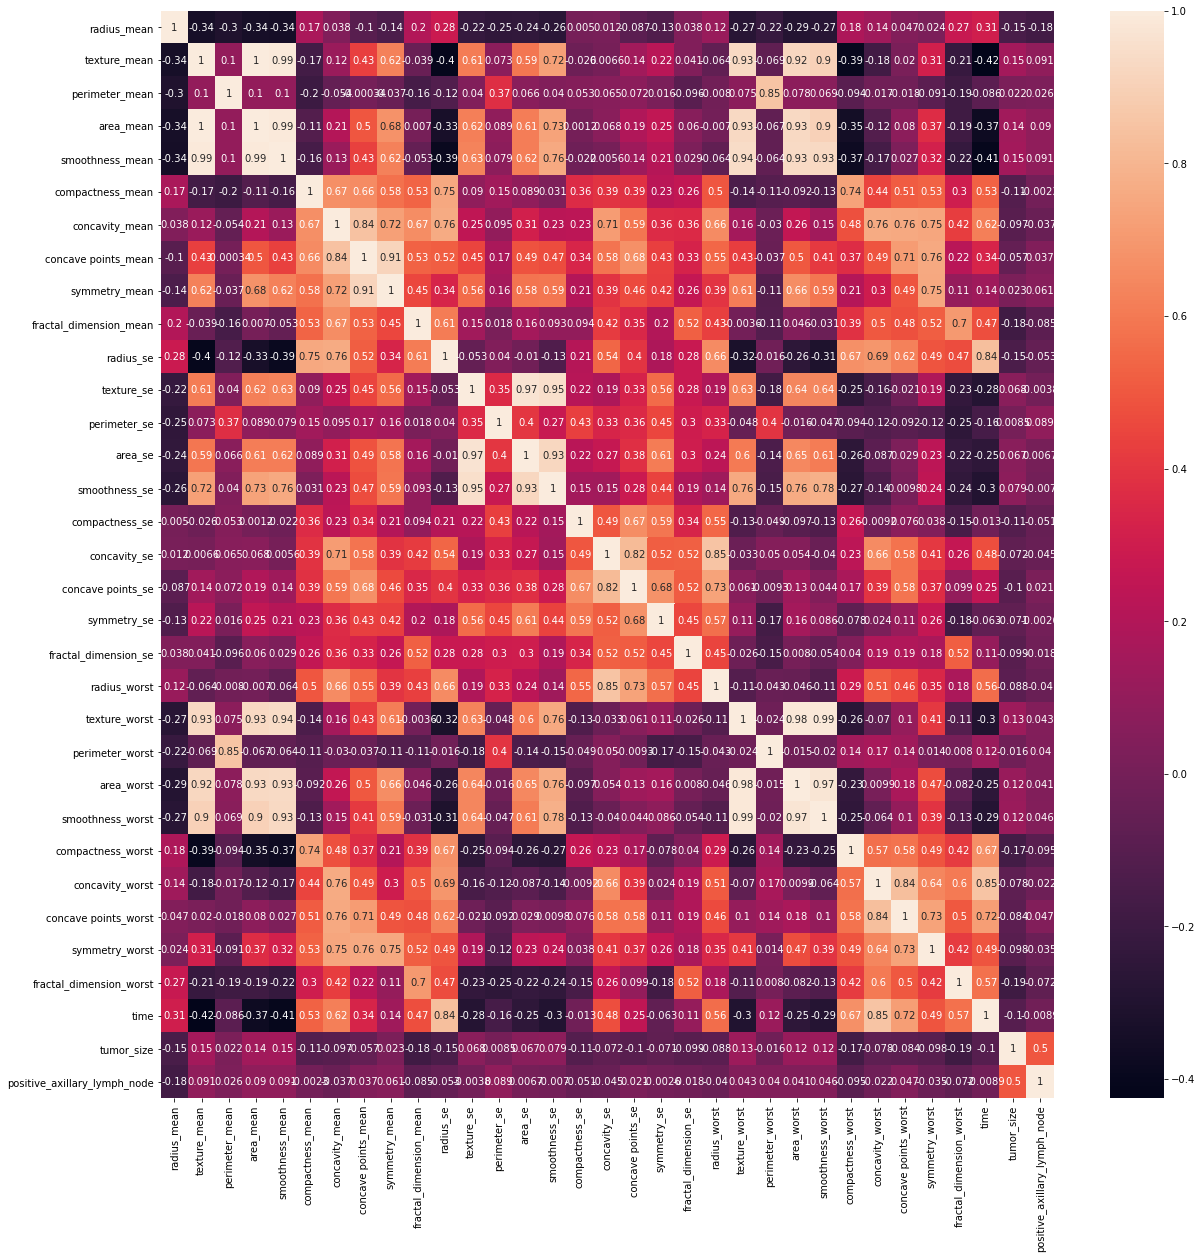

In [44]:
# Displaying a Correlation Matrix in the form of a Heatmap, in order to visualize the level of Correlation between
# each feature in the Dataset

correlationMatrix = train_features.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlationMatrix, annot=True,ax=ax)
plt.show()

In [45]:
# Removing Correalated Features due to large number of Correlated Features in this Dataset, the Variance of 
# the Model would be high therefore it would become quite sensitive to test data


# First a Set is made to store each Correlated Feature
correlated_features = set()

# For Loop that runs through each Column of the variable correlationMatrix which contains the 
# Degree of Relation between each feature
for i in range(len(correlationMatrix.columns)):
    
    # The Nested For loop is used to check the Degree of Relation between Column at index i and
    # every other column (index j) 
    for j in range(i):
        
        # Removing Correlated features that have a Degree of Relation greater than 0.85
        if abs(correlationMatrix.iloc[i, j]) > 0.85:
            
            colname = correlationMatrix.columns[i]
            correlated_features.add(colname)
            
print(correlated_features)

{'symmetry_mean', 'smoothness_worst', 'area_worst', 'area_mean', 'radius_worst', 'smoothness_mean', 'area_se', 'texture_worst', 'perimeter_worst', 'time', 'smoothness_se'}


In [46]:
# Dropping the Correlated features from train_features and test_features

train_features.drop(labels=correlated_features, axis=1, inplace=True)
test_features.drop(labels=correlated_features, axis=1, inplace=True)

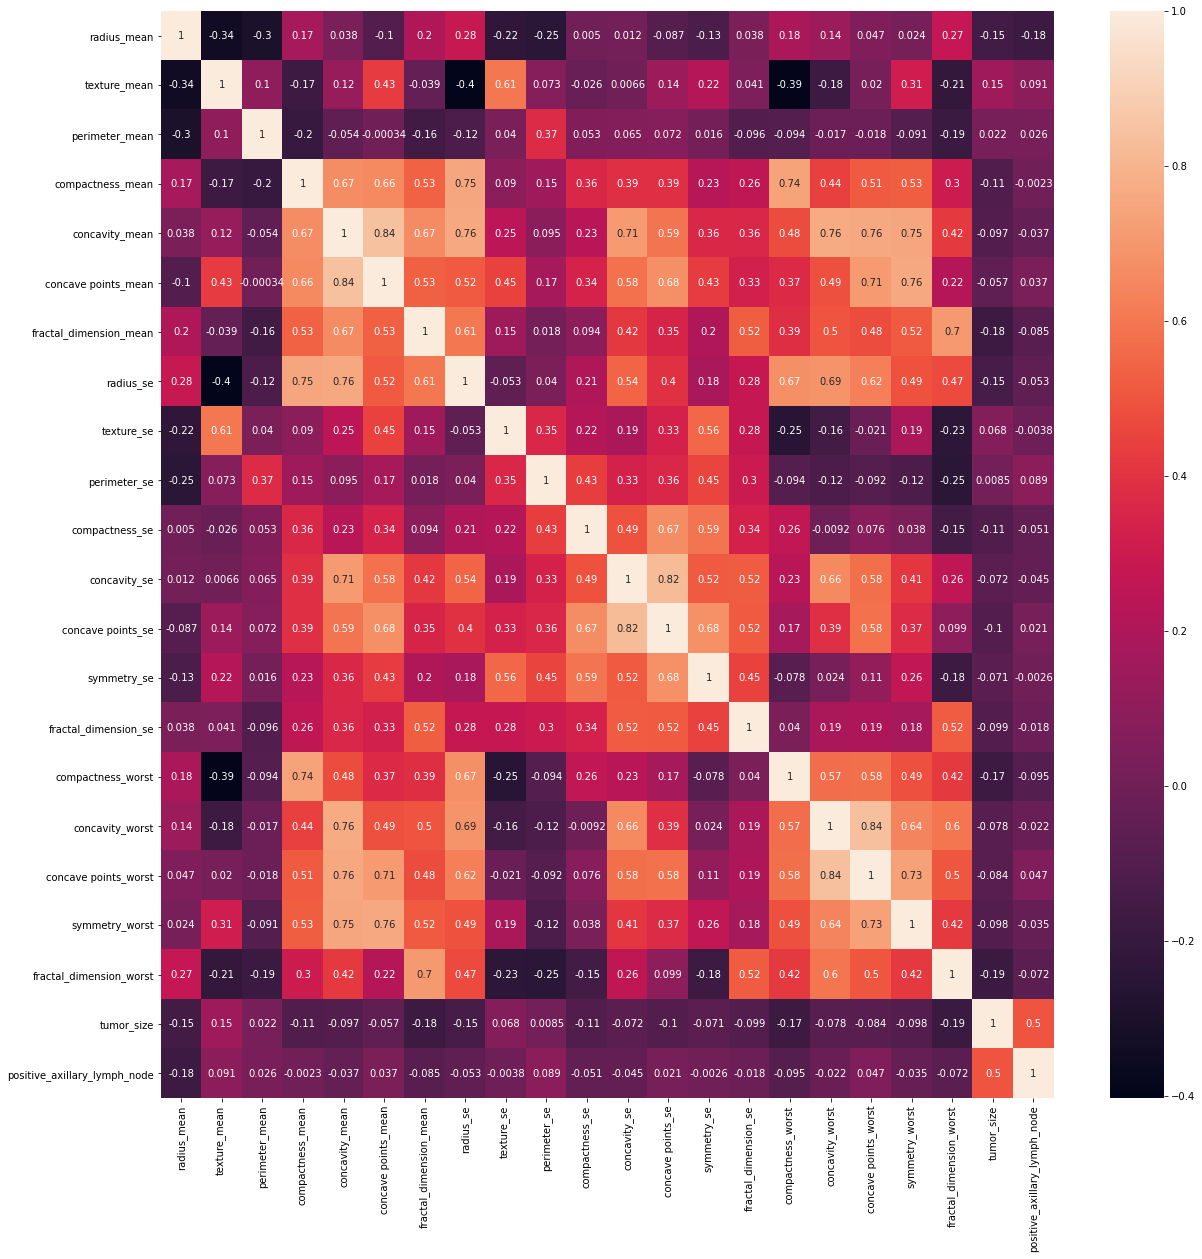

In [47]:
# Displaying the Correlation Matrix in the form of a Heatmap, after removing Correlated Features to ensure that
# Correlated Features are removed

correlationMatrix = train_features.corr()
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlationMatrix, annot=True,ax=ax)
plt.show()

In [48]:
# Removing Features with 0 Variance as any feature with 0 or low Variance will not have an impact on the 
# performance of the Model

constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(train_features)
train_features = constant_filter.transform(train_features)
test_features = constant_filter.transform(test_features)

train_features.shape, test_features.shape

((158, 22), (40, 22))

In [49]:
# Training the Model

clf = RandomForestClassifier(n_estimators=100) # Creating a Gaussian Classifier

clf.fit(train_features, train_labels)

<ipython-input-49-3236b97a7194>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(train_features, train_labels)


RandomForestClassifier()

In [50]:
# Testing the Model
y_pred=clf.predict(test_features)

# Checking Model Accuracy Score
metrics.accuracy_score(test_labels, y_pred)

0.775

In [69]:
# Model Evaluation

# Generating Metrics Report
confusion_matrix(test_labels, y_pred)
accuracy_score(test_labels, y_pred)

target_names = ['R', 'N'] # The Labels for the Report are the Two Outcomes Recurring and Non-Recurring
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           R       0.76      1.00      0.87        29
           N       1.00      0.18      0.31        11

    accuracy                           0.78        40
   macro avg       0.88      0.59      0.59        40
weighted avg       0.83      0.78      0.71        40

